In [1]:
import pandas as pd
import numpy as np
import os

headers = ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume(BTC)', 'Volume(Currency)', 'WeightedPrice']
data = pd.DataFrame(columns=headers)

for filename in os.listdir('../datasets/bitcoin-1'):
    data = pd.concat([data, pd.read_csv(f'../datasets/bitcoin-1/{filename}', index_col=False)])
    print(filename)
    
data['Change'] = data['Open'] - data['Close']
data['PerChange'] = (data['Open'] - data['Close'])/data['WeightedPrice']

2020-07-20.csv
2020-07-21.csv
2020-07-22.csv
2020-07-23.csv
2020-07-24.csv
2020-07-25.csv
2020-07-26.csv
2020-07-27.csv
2020-07-28.csv
2020-07-29.csv


In [49]:
changes = np.round(np.array(data['PerChange']), 5)

def split_sequence(seq, n_steps_in, n_steps_out):
    """
    Splits the univariate time sequence
    """
    X, y = [], []
    
    for i in range(len(seq)):
        end = i + n_steps_in
        out_end = end + n_steps_out
        
        if out_end > len(seq):
            break
        
        seq_x, seq_y = seq[i:end], seq[end:out_end]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

IN = 5
OUT = 1

X, y = split_sequence(changes, IN, OUT)

In [55]:
pX = X[1:]
pY = y[1:]

In [64]:
new = [X[0] * -1 for x in range(len(pX))]

In [79]:
summed = np.sum(pX + new, axis=1)
pd.Series(summed)

count    14373.000000
mean         0.000185
std          0.001598
min         -0.031170
25%         -0.000080
50%          0.000250
75%          0.000490
max          0.032840
dtype: float64

In [84]:
sum(pY[summed == 0])

array([-0.00015])

In [144]:
def find_similar(X, y):
    
    sims = {}
    
    for i in range(int(len(X)/10)):
        
        pX = np.delete(X, i, axis=0)
        pY = np.delete(y, i, axis=0)
                   
        new = [X[i] * -1 for x in range(len(pX))]

        summed = np.sum(pX + new, axis=1)
        
        if len(pY[summed == 0]) > 0:
                   
            sims.update({i: ((sum(pY[summed == 0]) + y[i])/len(pY[summed == 0]), len(pY[summed == 0]))}) 
            
            
        if i % 100 is 0:
            print(i)
            
    return sims
                   

In [145]:
s = find_similar(X, y)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400


In [151]:
vals = [s[0][0] for s in s.values()]
nums = [s[1] for s in s.values()]

In [152]:
pd.Series(vals).describe()

count    1429.000000
mean       -0.000003
std         0.000114
min        -0.001203
25%        -0.000021
50%        -0.000001
75%         0.000009
max         0.001350
dtype: float64

In [153]:
pd.Series(nums).describe()

count    1429.000000
mean      297.123163
std       386.710186
min         1.000000
25%        15.000000
50%        44.000000
75%       606.000000
max      1034.000000
dtype: float64

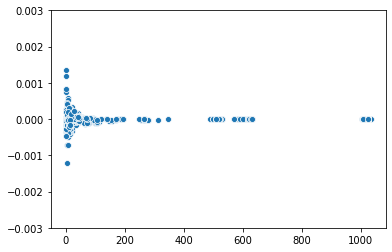

In [156]:
import matplotlib.pyplot as plt
plt.ylim(-0.003, 0.003)
sns.scatterplot(x=nums, y=vals)

In [163]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y.reshape(-1), test_size=0.2)
rf = RandomForestRegressor().fit(X_train, y_train)

In [164]:
prds = rf.predict(X_train)
mean_squared_error(y_train, prds)

1.47848306924072e-07

In [165]:
prds = rf.predict(X_test)
mean_squared_error(y_test, prds)

4.208388960334716e-07

In [166]:
y

array([[ 1.0e-04],
       [ 0.0e+00],
       [ 0.0e+00],
       ...,
       [-1.0e-05],
       [ 2.0e-04],
       [-8.2e-04]])